# Introduction to NumPy

This part of the book, along with [Part 3](03.00-Introduction-to-Pandas.ipynb), outlines techniques for effectively loading, storing, and manipulating in-memory data in Python.
The topic is very broad: datasets can come from a wide range of sources and in a wide range of formats, including collections of documents, collections of images, collections of sound clips, collections of numerical measurements, or nearly anything else.
Despite this apparent heterogeneity, many datasets can be represented fundamentally as arrays of numbers.

For example, images—particularly digital images—can be thought of as simply two-dimensional arrays of numbers representing pixel brightness across the area.
Sound clips can be thought of as one-dimensional arrays of intensity versus time.
Text can be converted in various ways into numerical representations, such as binary digits representing the frequency of certain words or pairs of words.
No matter what the data is, the first step in making it analyzable will be to transform it into arrays of numbers.
(We will discuss some specific examples of this process in [Feature Engineering](05.04-Feature-Engineering.ipynb).)

For this reason, efficient storage and manipulation of numerical arrays is absolutely fundamental to the process of doing data science.
We'll now take a look at the specialized tools that Python has for handling such numerical arrays: the NumPy package and the Pandas package (discussed in [Part 3](03.00-Introduction-to-Pandas.ipynb)).

This part of the book will cover NumPy in detail. NumPy (short for *Numerical Python*) provides an efficient interface to store and operate on dense data buffers.
In some ways, NumPy arrays are like Python's built-in `list` type, but NumPy arrays provide much more efficient storage and data operations as the arrays grow larger in size.
NumPy arrays form the core of nearly the entire ecosystem of data science tools in Python, so time spent learning to use NumPy effectively will be valuable no matter what aspect of data science interests you.

If you followed the advice outlined in the Preface and installed the Anaconda stack, you already have NumPy installed and ready to go.
If you're more the do-it-yourself type, you can go to http://www.numpy.org/ and follow the installation instructions found there.
Once you do, you can import NumPy and double-check the version:

In [ ]:
import numpy
numpy.__version__

'1.21.2'

For the pieces of the package discussed here, I'd recommend NumPy version 1.8 or later.
By convention, you'll find that most people in the SciPy/PyData world will import NumPy using `np` as an alias:

Saving Salary_dataset(practical 2).csv to Salary_dataset(practical 2) (1).csv
First few rows of the dataset:
   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0

Descriptive Statistics:
        Unnamed: 0  YearsExperience        Salary
mean     14.500000         5.413333  76004.000000
median   14.500000         4.800000  65238.000000
std       8.803408         2.837888  27414.429785


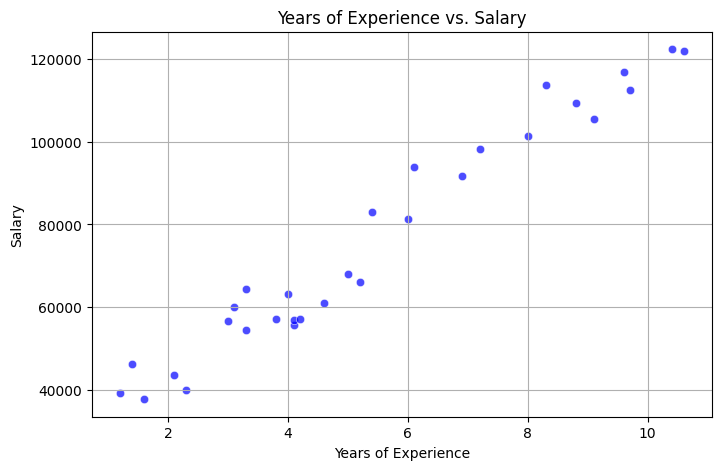


Model Summary:
                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     598.4
Date:                Fri, 14 Mar 2025   Prob (F-statistic):           1.91e-17
Time:                        09:28:15   Log-Likelihood:                -239.44
No. Observations:                  24   AIC:                             482.9
Df Residuals:                      22   BIC:                             485.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.438e+04

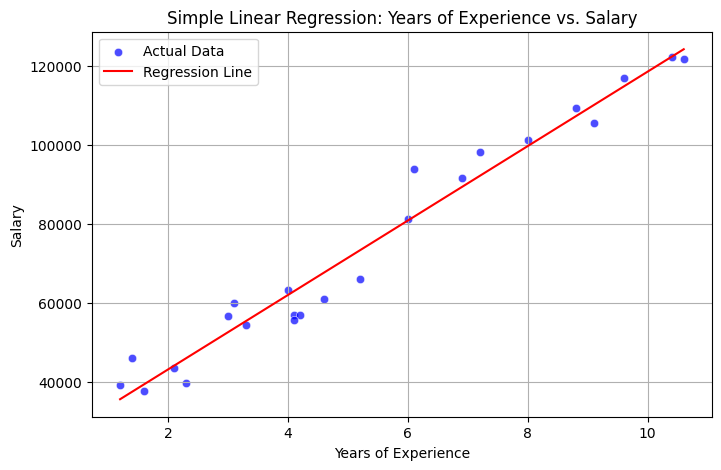

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import io

# Load the uploaded file from Google Colab
from google.colab import files
uploaded = files.upload()

# Read the uploaded CSV file
file_path = list(uploaded.keys())[0]  # Get the uploaded filename dynamically
df = pd.read_csv(io.BytesIO(uploaded[file_path]))

# Display first few rows
print("First few rows of the dataset:")
print(df.head())

# Compute basic descriptive statistics
descriptive_stats = df.describe().loc[['mean', '50%', 'std']]
descriptive_stats.rename(index={'50%': 'median'}, inplace=True)
print("\nDescriptive Statistics:")
print(descriptive_stats)

# Scatter plot of Years of Experience vs. Salary
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["YearsExperience"], y=df["Salary"], color='blue', alpha=0.7)
plt.title("Years of Experience vs. Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.grid(True)
plt.show()

# Define independent (X) and dependent (Y) variables
X = df[['YearsExperience']]
y = df['Salary']

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add constant to X_train for statsmodels regression
X_train_const = sm.add_constant(X_train)

# Fit Simple Linear Regression model
model = sm.OLS(y_train, X_train_const).fit()

# Display model summary
print("\nModel Summary:")
print(model.summary())

# Scatter plot with regression line
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_train["YearsExperience"], y=y_train, color='blue', alpha=0.7, label="Actual Data")

# Regression line
X_train_sorted = X_train.sort_values(by="YearsExperience")  # Sort for smooth line
y_pred = model.predict(sm.add_constant(X_train_sorted))
plt.plot(X_train_sorted, y_pred, color='red', label="Regression Line")

# Labels and title
plt.title("Simple Linear Regression: Years of Experience vs. Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.grid(True)
plt.show()


Throughout this chapter, and indeed the rest of the book, you'll find that this is the way we will import and use NumPy.

## Reminder About Built-in Documentation

As you read through this part of the book, don't forget that IPython gives you the ability to quickly explore the contents of a package (by using the tab completion feature), as well as the documentation of various functions (using the `?` character). For a refresher on these, refer back to [Help and Documentation in IPython](01.01-Help-And-Documentation.ipynb).

For example, to display all the contents of the NumPy namespace, you can type this:

```ipython
In [3]: np.<TAB>
```

And to display NumPy's built-in documentation, you can use this:

```ipython
In [4]: np?
```

More detailed documentation, along with tutorials and other resources, can be found at http://www.numpy.org.